For this first assignment we will study the golden ball player of the 2023 Women's World Cup, Aitana Bonmatí.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsbombpy import sb
from mplsoccer import Pitch

First of all let's find the competition we need.

In [2]:
competitions_df = sb.competitions()
competitions_df

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-08-17T23:51:11.837478,None,None,2023-08-17T23:51:11.837478
1,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
2,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
3,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
...,...,...,...,...,...,...,...,...,...,...,...,...
62,55,43,Europe,UEFA Euro,male,False,True,2020,2023-02-24T21:26:47.128979,2023-04-27T22:38:34.970148,2023-04-27T22:38:34.970148,2023-02-24T21:26:47.128979
63,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2023-06-18T19:28:39.443883,2021-06-13T16:17:31.694,None,2023-06-18T19:28:39.443883
64,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2023-07-17T21:19:03.032991,2023-07-17T21:21:56.497106,2023-07-17T21:21:56.497106,2023-07-17T21:19:03.032991
65,72,107,International,Women's World Cup,female,False,True,2023,2023-09-01T12:34:19.705316,2023-09-01T12:35:45.762196,2023-09-01T12:35:45.762196,2023-09-01T12:34:19.705316


In [3]:
competitions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   competition_id             67 non-null     int64 
 1   season_id                  67 non-null     int64 
 2   country_name               67 non-null     object
 3   competition_name           67 non-null     object
 4   competition_gender         67 non-null     object
 5   competition_youth          67 non-null     bool  
 6   competition_international  67 non-null     bool  
 7   season_name                67 non-null     object
 8   match_updated              67 non-null     object
 9   match_updated_360          51 non-null     object
 10  match_available_360        5 non-null      object
 11  match_available            67 non-null     object
dtypes: bool(2), int64(2), object(8)
memory usage: 5.5+ KB


In [4]:
competitions_df.competition_name.unique()

array(['1. Bundesliga', 'Champions League', 'Copa del Rey',
       "FA Women's Super League", 'FIFA U20 World Cup', 'FIFA World Cup',
       'Indian Super league', 'La Liga', 'Liga Profesional', 'Ligue 1',
       'North American League', 'NWSL', 'Premier League', 'Serie A',
       'UEFA Euro', 'UEFA Europa League', "UEFA Women's Euro",
       "Women's World Cup"], dtype=object)

In [5]:
competition_name = "Women's World Cup"
competitions_df[competitions_df['competition_name'] == competition_name]

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
65,72,107,International,Women's World Cup,female,False,True,2023,2023-09-01T12:34:19.705316,2023-09-01T12:35:45.762196,2023-09-01T12:35:45.762196,2023-09-01T12:34:19.705316
66,72,30,International,Women's World Cup,female,False,True,2019,2023-07-27T10:33:48.273734,2021-06-13T16:17:31.694,None,2023-07-27T10:33:48.273734


In [6]:
competition_id = 72
season_id = 107

wwc2023 = competitions_df[(competitions_df['competition_id'] == competition_id) & (competitions_df['season_id'] == season_id)]
wwc2023

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
65,72,107,International,Women's World Cup,female,False,True,2023,2023-09-01T12:34:19.705316,2023-09-01T12:35:45.762196,2023-09-01T12:35:45.762196,2023-09-01T12:34:19.705316


In [7]:
help(sb.competition_events)

Help on function competition_events in module statsbombpy.sb:

competition_events(country: str, division: str, season: str, gender: str = 'male', split: bool = False, filters: dict = {}, fmt: str = 'dataframe', creds: dict = {'user': None, 'passwd': None}, include_360_metrics=False) -> Union[pandas.core.frame.DataFrame, dict]



In [8]:
matches_df = sb.matches(competition_id, season_id)
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   match_id               64 non-null     int64 
 1   match_date             64 non-null     object
 2   kick_off               64 non-null     object
 3   competition            64 non-null     object
 4   season                 64 non-null     object
 5   home_team              64 non-null     object
 6   away_team              64 non-null     object
 7   home_score             64 non-null     int64 
 8   away_score             64 non-null     int64 
 9   match_status           64 non-null     object
 10  match_status_360       64 non-null     object
 11  last_updated           64 non-null     object
 12  last_updated_360       64 non-null     object
 13  match_week             64 non-null     int64 
 14  competition_stage      64 non-null     object
 15  stadium                64

In [9]:
unique_home_teams = set(matches_df['home_team'])
unique_away_teams = set(matches_df['away_team'])

unique_teams = unique_home_teams.union(unique_away_teams)
unique_teams

{"Argentina Women's",
 "Australia Women's",
 "Brazil Women's",
 "Canada Women's",
 "China PR Women's",
 "Colombia Women's",
 "Costa Rica Women's",
 "Denmark Women's",
 "England Women's",
 "France Women's",
 "Germany Women's",
 "Haiti Women's",
 "Italy Women's",
 "Jamaica Women's",
 "Japan Women's",
 "Korea Republic Women's",
 "Morocco Women's",
 "Netherlands Women's",
 "New Zealand Women's",
 "Nigeria Women's",
 "Norway Women's",
 "Panama Women's",
 "Philippines Women's",
 "Portugal Women's",
 "Republic of Ireland Women's",
 "South Africa Women's",
 "Spain Women's",
 "Sweden Women's",
 "Switzerland Women's",
 "United States Women's",
 "Vietnam Women's",
 "Zambia Women's"}

In [10]:
top2_teams = ["Spain Women's", "England Women's"]
top4_teams = top2_teams + ["Sweden Women's", "Australia Women's"]
top8_teams = top4_teams + ["Netherlands Women's", "Japan Women's", "Colombia Women's", "France Women's"]

In [11]:
team_name = "Spain Women's"
# team_mask = (matches_df['home_team'] == team_name) | (matches_df['away_team'] == team_name)
# team_matches_df = matches_df[team_mask]
# team_matches_df

In [12]:
# team_matches_id = list(team_matches_df.match_id)
# team_matches_id

In [13]:
# dataframes_to_concatenate = []
# for match_id in team_matches_id:
#     events = sb.events(match_id)
#     dataframes_to_concatenate.append(events)
    
# wwc2023_spain_matches_events = pd.concat(dataframes_to_concatenate, ignore_index=True)

In [14]:
# team_events_mask = wwc2023_spain_matches_events['team'] == team_name
# wwc2023_spain_events = wwc2023_spain_matches_events[team_events_mask]

In [15]:
# passes2_df = wwc2023_spain_events[wwc2023_spain_events.type == 'Pass']
# passes2_df

In [16]:
# passes2_df.groupby('match_id').size().reset_index(name='count')

In [18]:
wwc2023_events = sb.competition_events(
    country=wwc2023['country_name'].iloc[0],
    division=wwc2023['competition_name'].iloc[0],
    season=wwc2023['season_name'].iloc[0],
    gender=wwc2023['competition_gender'].iloc[0],
    # split=True
)

In [127]:
# cols = [ 'pass_body_part', 'pass_end_location', 'pass_height', 'pass_outcome', 'pass_shot_assist', 'pass_goal_assist', 'pass_through_ball', 'pass_type', 'under_pressure']

In [148]:
cols = ['id', 'index', 'match_id', 'player', 'type', 'location', 'carry_end_location', 'pass_end_location', 'pass_shot_assist', 'pass_goal_assist', 'pass_through_ball', 'pass_technique']

In [130]:
match_id = 3893791
match_events = wwc2023_events[wwc2023_events['match_id'] == match_id].sort_values('index')
match_events

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,clearance_aerial_won,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Spain Women's,863,00:00:00.000,Starting XI,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 343, 'lineup': [{'player': {'id'...",Costa Rica Women's,1832,00:00:00.000,Starting XI,NaN
298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Spain Women's,863,00:00:00.000,Half Start,NaN
299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Costa Rica Women's,1832,00:00:00.000,Half Start,NaN
35455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Spain Women's,863,00:00:01.094,Pass,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[116.6, 17.1]",NaN,...,NaN,NaN,NaN,NaN,NaN,Spain Women's,863,00:49:55.368,Carry,True
186653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Costa Rica Women's,1832,00:49:56.189,Pressure,NaN
197986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Spain Women's,863,00:49:57.593,Miscontrol,NaN
224170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Costa Rica Women's,1832,00:50:21.354,Half End,NaN


In [131]:
match_events[cols]

,id,index,match_id,player,type,location,carry_end_location,pass_end_location,pass_shot_assist,pass_goal_assist,pass_through_ball
74,22a36f18-7f4a-4c76-8261-0576a931f740,1,3893791,NaN,Starting XI,NaN,NaN,NaN,NaN,NaN,NaN
75,91f9ba00-b980-4a60-bd0c-8c3adce56d33,2,3893791,NaN,Starting XI,NaN,NaN,NaN,NaN,NaN,NaN
298,97d0ebbb-1445-4844-a4cb-51d1f95c86ee,3,3893791,NaN,Half Start,NaN,NaN,NaN,NaN,NaN,NaN
299,dcd40955-0500-4262-8c78-fdfb71a866f6,4,3893791,NaN,Half Start,NaN,NaN,NaN,NaN,NaN,NaN
35455,550ee9c4-8961-4260-b0c7-603c8f8939f2,5,3893791,Esther Gonzalez Rodríguez,Pass,"[61.0, 40.1]",NaN,"[42.0, 40.4]",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
145104,142c93f2-4a56-41cc-ab2c-c60e602eb500,3320,3893791,María Francesca Caldentey Oliver,Carry,"[117.3, 16.6]","[116.6, 17.1]",NaN,NaN,NaN,NaN
186653,d25b9785-3bfc-46a5-a58c-2519dd3ee5bf,3321,3893791,María Paula Coto González,Pressure,"[3.8, 62.0]",NaN,NaN,NaN,NaN,NaN
197986,0d3b74d0-4787-4672-98fe-4b1187e39370,3322,3893791,María Francesca Caldentey Oliver,Miscontrol,"[116.6, 17.1]",NaN,NaN,NaN,NaN,NaN
224170,b691b636-1f01-4129-87a3-32c09867f738,3323,3893791,NaN,Half End,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
events_between_carry_and_pass = ['Dribble', 'Pressure']

# mal por el or
# pass_not_preceded_by_carry_mask = (
#     (match_events['type'].eq('Pass') & 
#      ~match_events['type'].shift(1).eq('Carry')
#     ) |
#     (match_events['type'].eq('Pass') & 
#      match_events['type'].shift(1).isin(events_between_carry_and_pass) & 
#      ~match_events['type'].shift(2).eq('Carry')
#     )
# )

pass_not_preceded_by_carry_mask = (
    match_events['type'].eq('Pass') &
    ~(
        match_events['type'].shift(1).eq('Carry') |
        (
            match_events['type'].shift(1).isin(events_between_carry_and_pass) &
            match_events['type'].shift(2).eq('Carry')
        )
    )
)


pass_not_preceded_by_carry_df = match_events[pass_not_preceded_by_carry_mask][cols]
pass_not_preceded_by_carry_df

,id,index,match_id,player,type,location,carry_end_location,pass_end_location,pass_shot_assist,pass_goal_assist,pass_through_ball
35455,550ee9c4-8961-4260-b0c7-603c8f8939f2,5,3893791,Esther Gonzalez Rodríguez,Pass,"[61.0, 40.1]",NaN,"[42.0, 40.4]",NaN,NaN,NaN
35465,931d15f1-cbef-4b3f-9049-0105b2b51099,35,3893791,Daniela Solera Vega,Pass,"[6.0, 44.0]",NaN,"[62.9, 0.1]",NaN,NaN,NaN
35466,19f7f166-0e03-4ff5-a478-acabcfb67445,37,3893791,Ona Batlle Pascual,Pass,"[57.2, 80.0]",NaN,"[46.9, 70.7]",NaN,NaN,NaN
35478,490d5b9f-5768-4103-816b-a4b5f615cd44,76,3893791,Olga Carmona García,Pass,"[81.4, 0.1]",NaN,"[62.3, 9.4]",NaN,NaN,NaN
35481,62955aee-e178-4ac2-8be0-a302be0cd935,84,3893791,María Paula Coto González,Pass,"[21.1, 51.4]",NaN,"[40.8, 48.1]",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
36292,e1067eff-abed-4d7d-9140-fc252219e80b,3270,3893791,María Paula Coto González,Pass,"[30.5, 61.7]",NaN,"[52.3, 76.2]",NaN,NaN,NaN
36293,b4d22734-f155-4188-a260-e9983c929c75,3276,3893791,María Paula Coto González,Pass,"[75.1, 80.0]",NaN,"[90.9, 75.7]",NaN,NaN,NaN
36294,4d734b92-d6d9-4e52-88b0-564ec5f763f8,3278,3893791,Olga Carmona García,Pass,"[29.2, 4.4]",NaN,"[34.4, 2.3]",NaN,NaN,NaN
36299,349683a7-8355-4135-a2ad-2d5bf243539b,3295,3893791,Fabiola Villalobos Morales,Pass,"[12.9, 36.7]",NaN,"[65.2, 37.7]",NaN,NaN,NaN


In [137]:
carry_and_pass_df.pass_shot_assist.sum()

19

In [138]:
carry_and_pass_df.pass_goal_assist.sum()

0

In [139]:
carry_and_pass_df.pass_through_ball.sum()

0

In [133]:
carry_and_pass_mask = (
    (match_events['type'].eq('Carry') & 
     match_events['type'].shift(-1).eq('Pass') &
     match_events['player'].eq(match_events['player'].shift(-1))
    ) |
    (match_events['type'].eq('Carry') & 
     match_events['type'].shift(-1).isin(events_between_carry_and_pass) & 
     match_events['type'].shift(-2).eq('Pass') & 
     match_events['player'].eq(match_events['player'].shift(-2))
    )
)


carry_and_pass_df = match_events[carry_and_pass_mask][cols]
carry_and_pass_df['next_type'] = match_events['type'].shift(-1).where(carry_and_pass_mask)

carry_and_pass_df['pass_location'] = match_events['location'].shift(-1).where(carry_and_pass_mask)
carry_and_pass_df['pass_location'].mask(carry_and_pass_df['next_type'].isin(events_between_carry_and_pass), match_events['location'].shift(-2).where(carry_and_pass_mask),
                                        inplace=True)

carry_and_pass_df['pass_end_location'] = match_events['pass_end_location'].shift(-1).where(carry_and_pass_mask)
carry_and_pass_df['pass_end_location'].mask(carry_and_pass_df['next_type'].isin(events_between_carry_and_pass), match_events['pass_end_location'].shift(-2).where(carry_and_pass_mask),
                                        inplace=True)
carry_and_pass_df['pass_shot_assist'] = match_events['pass_shot_assist'].shift(-1).where(carry_and_pass_mask)
carry_and_pass_df['pass_shot_assist'].mask(carry_and_pass_df['next_type'].isin(events_between_carry_and_pass), match_events['pass_shot_assist'].shift(-2).where(carry_and_pass_mask),
                                        inplace=True)
carry_and_pass_df['pass_goal_assist'] = match_events['pass_goal_assist'].shift(-1).where(carry_and_pass_mask)
carry_and_pass_df['pass_goal_assist'].mask(carry_and_pass_df['next_type'].isin(events_between_carry_and_pass), match_events['pass_goal_assist'].shift(-2).where(carry_and_pass_mask),
                                        inplace=True)
carry_and_pass_df['pass_through_ball'] = match_events['pass_through_ball'].shift(-1).where(carry_and_pass_mask)
carry_and_pass_df['pass_through_ball'].mask(carry_and_pass_df['next_type'].isin(events_between_carry_and_pass), match_events['pass_through_ball'].shift(-2).where(carry_and_pass_mask),
                                        inplace=True)

carry_and_pass_df

,id,index,match_id,player,type,location,carry_end_location,pass_end_location,pass_shot_assist,pass_goal_assist,pass_through_ball,next_type,pass_location
144419,39370835-1a68-405d-bcb3-7df55ef1906e,7,3893791,Teresa Abelleira Dueñas,Carry,"[42.0, 40.4]","[44.3, 40.5]","[47.7, 51.7]",NaN,NaN,NaN,Pass,"[44.3, 40.5]"
144420,31dc1875-f24b-4ef4-af1e-916aa0b56ad9,10,3893791,Aitana Bonmati Conca,Carry,"[47.7, 51.7]","[52.6, 55.7]","[53.0, 67.5]",NaN,NaN,NaN,Pass,"[52.6, 55.7]"
144421,bc208a8f-f89c-4358-8332-feedc6ade0e5,13,3893791,Ona Batlle Pascual,Carry,"[53.0, 67.5]","[53.9, 68.1]","[53.5, 42.5]",NaN,NaN,NaN,Pass,"[53.9, 68.1]"
144422,10ebae5b-1952-4ba7-b578-04f0b64d2cf9,16,3893791,Teresa Abelleira Dueñas,Carry,"[53.5, 42.5]","[56.8, 40.8]","[71.8, 18.9]",NaN,NaN,NaN,Pass,"[56.8, 40.8]"
144423,fbbbf36f-7579-494c-907b-a00b89195cf1,19,3893791,Jennifer Hermoso Fuentes,Carry,"[71.8, 18.9]","[69.7, 13.2]","[54.2, 20.5]",NaN,NaN,NaN,Pass,"[69.7, 13.2]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145097,0b336ae8-13c9-4db6-977c-1fd298668733,3284,3893791,Claudia Zornoza Sánchez,Carry,"[33.0, 10.4]","[51.2, 13.8]","[64.1, 29.1]",NaN,NaN,NaN,Pass,"[51.2, 13.8]"
145098,c5cfe043-724d-43f9-a686-9b969d2c41c3,3287,3893791,Aitana Bonmati Conca,Carry,"[64.1, 29.1]","[63.7, 31.9]","[83.5, 70.7]",NaN,NaN,NaN,Pass,"[63.7, 31.9]"
145099,e5192ace-ac53-48c4-bec0-483cba2fd5cf,3290,3893791,Oihane Hernández Zurbano,Carry,"[83.5, 70.7]","[106.3, 70.9]","[114.6, 41.9]",NaN,NaN,NaN,Pressure,"[106.3, 70.9]"
145102,79adab2c-6477-4f6b-9547-29a8d22ec052,3309,3893791,Alexia Putellas Segura,Carry,"[91.5, 29.9]","[99.2, 26.4]","[114.5, 22.6]",NaN,NaN,NaN,Pass,"[99.2, 26.4]"


In [113]:
sum(match_events['type'] == 'Pass') - len(pass_not_preceded_by_carry_df) - len(carry_and_pass_df)

0

In [71]:
carry_mask = match_events['type'].eq('Carry')

carry_not_followed_by_pass_mask = carry_mask & ~carry_and_pass_mask

# Use the mask to filter the events
carry_not_followed_by_pass_df = match_events[carry_not_followed_by_pass_mask][cols]
carry_not_followed_by_pass_df

,id,index,match_id,player,type,location,carry_end_location,pass_end_location
144447,9e9156b3-255a-46fc-affe-5526d45340c6,111,3893791,Salma Paralluelo Ayingono,Carry,"[110.4, 35.8]","[110.4, 35.8]",NaN
144466,af8d9087-c0eb-4483-9d00-5e57e858cf60,189,3893791,Salma Paralluelo Ayingono,Carry,"[87.4, 25.2]","[86.1, 25.5]",NaN
144467,fb4593ae-0cf3-444a-8e53-cc9e096f2a5e,193,3893791,María Paula Salas,Carry,"[34.0, 53.9]","[33.1, 51.2]",NaN
144475,a9e8b9c8-76a4-4d7f-bc60-19b34b5dd66c,227,3893791,María Paula Salas,Carry,"[29.3, 27.4]","[28.6, 29.7]",NaN
144477,5c2d88a9-4de5-4e59-902b-ef26bad9aa94,242,3893791,Priscila Chinchilla,Carry,"[104.2, 4.4]","[105.9, 8.6]",NaN
...,...,...,...,...,...,...,...,...
145087,0c96623e-d696-47a6-88ac-8c92ab17824b,3227,3893791,Olga Carmona García,Carry,"[98.3, 26.7]","[99.4, 28.1]",NaN
145095,c0fc920b-76c0-4969-9852-e092f0e12d1f,3272,3893791,Melissa Herrera Monge,Carry,"[52.3, 76.2]","[56.8, 77.6]",NaN
145100,1be15507-7048-471f-8aee-23671b62c21e,3301,3893791,Alexia Putellas Segura,Carry,"[63.5, 39.3]","[64.1, 41.1]",NaN
145101,a4feec86-6c11-4ce9-93ca-9ef1be500147,3304,3893791,Alexia Putellas Segura,Carry,"[64.1, 41.1]","[91.5, 29.9]",NaN


In [114]:
sum(match_events['type'] == 'Carry') - len(carry_not_followed_by_pass_df) - len(carry_and_pass_df)

0

In [115]:
forward_carry_not_followed_by_pass_df = carry_not_followed_by_pass_df[carry_not_followed_by_pass_df['location'].apply(lambda x: x[0]) < carry_not_followed_by_pass_df['carry_end_location'].apply(lambda x: x[0])]
forward_carry_not_followed_by_pass_df

,id,index,match_id,player,type,location,carry_end_location,pass_end_location
144477,5c2d88a9-4de5-4e59-902b-ef26bad9aa94,242,3893791,Priscila Chinchilla,Carry,"[104.2, 4.4]","[105.9, 8.6]",NaN
144486,062d78d3-9b52-478e-9f91-2d60506d6aa5,281,3893791,Salma Paralluelo Ayingono,Carry,"[90.5, 5.9]","[91.5, 8.1]",NaN
144488,48b04077-1868-4ac0-bfe0-cd14ef42d329,290,3893791,Esther Gonzalez Rodríguez,Carry,"[102.9, 27.1]","[104.2, 29.7]",NaN
144491,c40834b3-621f-4a78-bb5f-892b2fd020b9,302,3893791,Melissa Herrera Monge,Carry,"[27.1, 53.4]","[29.3, 59.5]",NaN
144498,b311e096-a135-49e6-9466-ba275173c8a0,338,3893791,Aitana Bonmati Conca,Carry,"[69.3, 71.4]","[75.4, 73.2]",NaN
...,...,...,...,...,...,...,...,...
145080,b88fae40-db2c-4333-852c-5aeb623c33fa,3195,3893791,Jennifer Hermoso Fuentes,Carry,"[115.0, 75.3]","[116.8, 68.5]",NaN
145087,0c96623e-d696-47a6-88ac-8c92ab17824b,3227,3893791,Olga Carmona García,Carry,"[98.3, 26.7]","[99.4, 28.1]",NaN
145095,c0fc920b-76c0-4969-9852-e092f0e12d1f,3272,3893791,Melissa Herrera Monge,Carry,"[52.3, 76.2]","[56.8, 77.6]",NaN
145100,1be15507-7048-471f-8aee-23671b62c21e,3301,3893791,Alexia Putellas Segura,Carry,"[63.5, 39.3]","[64.1, 41.1]",NaN


In [116]:
player_name = "Aitana Bonmati Conca"
aitana_forward_carry_not_followed_by_pass_df = forward_carry_not_followed_by_pass_df[forward_carry_not_followed_by_pass_df['player'] == player_name]
aitana_forward_carry_not_followed_by_pass_df

,id,index,match_id,player,type,location,carry_end_location,pass_end_location
144498,b311e096-a135-49e6-9466-ba275173c8a0,338,3893791,Aitana Bonmati Conca,Carry,"[69.3, 71.4]","[75.4, 73.2]",NaN
144541,17a6c89c-0626-45c3-80c5-ac95cfc54e65,542,3893791,Aitana Bonmati Conca,Carry,"[100.4, 50.4]","[102.1, 50.7]",NaN
144608,7141b142-e53a-44a1-9953-a5a4011f1e87,860,3893791,Aitana Bonmati Conca,Carry,"[106.5, 47.6]","[107.7, 46.9]",NaN
144928,ea192cb6-2068-4aeb-b093-64e66f38e4b3,2458,3893791,Aitana Bonmati Conca,Carry,"[110.8, 55.8]","[115.0, 56.0]",NaN
145053,1f701884-8c11-4b95-b294-78a7d22a209d,3068,3893791,Aitana Bonmati Conca,Carry,"[103.9, 42.1]","[104.5, 45.9]",NaN


In [117]:
forward_carry_and_pass_df = carry_and_pass_df[carry_and_pass_df['location'].apply(lambda x: x[0]) < carry_and_pass_df['pass_end_location'].apply(lambda x: x[0])]
forward_carry_and_pass_df

,id,index,match_id,player,type,location,carry_end_location,pass_end_location,next_type,pass_location
144419,39370835-1a68-405d-bcb3-7df55ef1906e,7,3893791,Teresa Abelleira Dueñas,Carry,"[42.0, 40.4]","[44.3, 40.5]","[47.7, 51.7]",Pass,"[44.3, 40.5]"
144420,31dc1875-f24b-4ef4-af1e-916aa0b56ad9,10,3893791,Aitana Bonmati Conca,Carry,"[47.7, 51.7]","[52.6, 55.7]","[53.0, 67.5]",Pass,"[52.6, 55.7]"
144421,bc208a8f-f89c-4358-8332-feedc6ade0e5,13,3893791,Ona Batlle Pascual,Carry,"[53.0, 67.5]","[53.9, 68.1]","[53.5, 42.5]",Pass,"[53.9, 68.1]"
144422,10ebae5b-1952-4ba7-b578-04f0b64d2cf9,16,3893791,Teresa Abelleira Dueñas,Carry,"[53.5, 42.5]","[56.8, 40.8]","[71.8, 18.9]",Pass,"[56.8, 40.8]"
144424,7c377cd1-cd8b-4bd1-b25e-3fb21d4ba742,22,3893791,Ivana Andrés Sanz,Carry,"[54.2, 20.5]","[55.9, 24.2]","[58.5, 39.2]",Pass,"[55.9, 24.2]"
...,...,...,...,...,...,...,...,...,...,...
145097,0b336ae8-13c9-4db6-977c-1fd298668733,3284,3893791,Claudia Zornoza Sánchez,Carry,"[33.0, 10.4]","[51.2, 13.8]","[64.1, 29.1]",Pass,"[51.2, 13.8]"
145098,c5cfe043-724d-43f9-a686-9b969d2c41c3,3287,3893791,Aitana Bonmati Conca,Carry,"[64.1, 29.1]","[63.7, 31.9]","[83.5, 70.7]",Pass,"[63.7, 31.9]"
145099,e5192ace-ac53-48c4-bec0-483cba2fd5cf,3290,3893791,Oihane Hernández Zurbano,Carry,"[83.5, 70.7]","[106.3, 70.9]","[114.6, 41.9]",Pressure,"[106.3, 70.9]"
145102,79adab2c-6477-4f6b-9547-29a8d22ec052,3309,3893791,Alexia Putellas Segura,Carry,"[91.5, 29.9]","[99.2, 26.4]","[114.5, 22.6]",Pass,"[99.2, 26.4]"


In [118]:
aitana_forward_carry_and_pass_df = forward_carry_and_pass_df[forward_carry_and_pass_df['player'] == player_name]
aitana_forward_carry_and_pass_df

,id,index,match_id,player,type,location,carry_end_location,pass_end_location,next_type,pass_location
144420,31dc1875-f24b-4ef4-af1e-916aa0b56ad9,10,3893791,Aitana Bonmati Conca,Carry,"[47.7, 51.7]","[52.6, 55.7]","[53.0, 67.5]",Pass,"[52.6, 55.7]"
144446,ef096ab4-d229-4ca5-8416-65b4eaee66e1,104,3893791,Aitana Bonmati Conca,Carry,"[97.9, 67.3]","[97.8, 65.6]","[110.8, 72.8]",Pressure,"[97.8, 65.6]"
144459,36f9caad-1906-4fd9-9754-c068154ec139,158,3893791,Aitana Bonmati Conca,Carry,"[81.4, 72.3]","[79.3, 69.7]","[91.7, 78.5]",Pressure,"[79.3, 69.7]"
144468,8fef9adf-0424-420a-85c7-32dc11e9e368,198,3893791,Aitana Bonmati Conca,Carry,"[87.8, 38.7]","[85.3, 41.7]","[90.5, 57.3]",Pass,"[85.3, 41.7]"
144512,ff8a3372-39ac-493d-bb51-d8f0020b20be,391,3893791,Aitana Bonmati Conca,Carry,"[92.6, 73.0]","[91.7, 71.0]","[97.4, 66.0]",Pass,"[91.7, 71.0]"
144528,c5d077aa-8041-4681-9de9-6644659d5d33,484,3893791,Aitana Bonmati Conca,Carry,"[83.6, 49.1]","[84.5, 44.0]","[90.5, 33.5]",Pass,"[84.5, 44.0]"
144562,66aa6458-b742-4334-8fcd-549429f329df,632,3893791,Aitana Bonmati Conca,Carry,"[109.4, 52.1]","[112.2, 55.4]","[112.8, 40.9]",Pressure,"[112.2, 55.4]"
144590,f993f299-c8fd-4ad3-b871-e93208e44197,781,3893791,Aitana Bonmati Conca,Carry,"[80.0, 72.4]","[87.0, 72.4]","[83.6, 65.4]",Pass,"[87.0, 72.4]"
144597,c6df0332-1291-45ab-96ba-a4908b3385a8,802,3893791,Aitana Bonmati Conca,Carry,"[99.6, 28.4]","[99.1, 31.8]","[114.3, 27.9]",Pass,"[99.1, 31.8]"
144602,80f4f572-429b-4623-8633-948919d6db42,837,3893791,Aitana Bonmati Conca,Carry,"[82.8, 70.2]","[82.4, 73.2]","[94.8, 78.5]",Pass,"[82.4, 73.2]"


In [119]:
forward_pass_not_preceded_by_carry_df = pass_not_preceded_by_carry_df[pass_not_preceded_by_carry_df['location'].apply(lambda x: x[0]) < pass_not_preceded_by_carry_df['pass_end_location'].apply(lambda x: x[0])]
forward_pass_not_preceded_by_carry_df

,id,index,match_id,player,type,location,carry_end_location,pass_end_location
35465,931d15f1-cbef-4b3f-9049-0105b2b51099,35,3893791,Daniela Solera Vega,Pass,"[6.0, 44.0]",NaN,"[62.9, 0.1]"
35481,62955aee-e178-4ac2-8be0-a302be0cd935,84,3893791,María Paula Coto González,Pass,"[21.1, 51.4]",NaN,"[40.8, 48.1]"
35511,8105b53d-fac4-4639-961e-9d08dbed8bfd,180,3893791,Daniela Solera Vega,Pass,"[6.0, 36.0]",NaN,"[45.1, 54.6]"
35512,b8869c61-5b37-4cef-91aa-483da251db54,182,3893791,Teresa Abelleira Dueñas,Pass,"[75.0, 25.5]",NaN,"[87.4, 33.9]"
35513,be94d4ae-a72c-4054-a4a6-327cddd53408,184,3893791,Katherine Maria Alvarado Aguilar,Pass,"[32.7, 46.2]",NaN,"[38.1, 50.4]"
...,...,...,...,...,...,...,...,...
36292,e1067eff-abed-4d7d-9140-fc252219e80b,3270,3893791,María Paula Coto González,Pass,"[30.5, 61.7]",NaN,"[52.3, 76.2]"
36293,b4d22734-f155-4188-a260-e9983c929c75,3276,3893791,María Paula Coto González,Pass,"[75.1, 80.0]",NaN,"[90.9, 75.7]"
36294,4d734b92-d6d9-4e52-88b0-564ec5f763f8,3278,3893791,Olga Carmona García,Pass,"[29.2, 4.4]",NaN,"[34.4, 2.3]"
36299,349683a7-8355-4135-a2ad-2d5bf243539b,3295,3893791,Fabiola Villalobos Morales,Pass,"[12.9, 36.7]",NaN,"[65.2, 37.7]"


In [120]:
aitana_forward_pass_not_preceded_by_carry_df = forward_pass_not_preceded_by_carry_df[forward_pass_not_preceded_by_carry_df['player'] == player_name]
aitana_forward_pass_not_preceded_by_carry_df

,id,index,match_id,player,type,location,carry_end_location,pass_end_location
35863,4922f4de-88d3-46c6-8be0-2996a0e206d4,1606,3893791,Aitana Bonmati Conca,Pass,"[106.4, 43.2]",NaN,"[109.0, 45.3]"


In [121]:
only_pass_start_x = [location[0] for location in aitana_forward_pass_not_preceded_by_carry_df['location']]
only_pass_start_y = [location[1] for location in aitana_forward_pass_not_preceded_by_carry_df['location']]
only_pass_end_x = [location[0] for location in aitana_forward_pass_not_preceded_by_carry_df['pass_end_location']]
only_pass_end_y = [location[1] for location in aitana_forward_pass_not_preceded_by_carry_df['pass_end_location']]

In [122]:
only_carry_start_x = [location[0] for location in aitana_forward_carry_not_followed_by_pass_df['location']]
only_carry_start_y = [location[1] for location in aitana_forward_carry_not_followed_by_pass_df['location']]
only_carry_end_x = [location[0] for location in aitana_forward_carry_not_followed_by_pass_df['carry_end_location']]
only_carry_end_y = [location[1] for location in aitana_forward_carry_not_followed_by_pass_df['carry_end_location']]

In [123]:
carry_start_x = [location[0] for location in aitana_forward_carry_and_pass_df['location']]
carry_start_y = [location[1] for location in aitana_forward_carry_and_pass_df['location']]
pass_start_x = [location[0] for location in aitana_forward_carry_and_pass_df['pass_location']]
pass_start_y = [location[1] for location in aitana_forward_carry_and_pass_df['pass_location']]
pass_end_x = [location[0] for location in aitana_forward_carry_and_pass_df['pass_end_location']]
pass_end_y = [location[1] for location in aitana_forward_carry_and_pass_df['pass_end_location']]

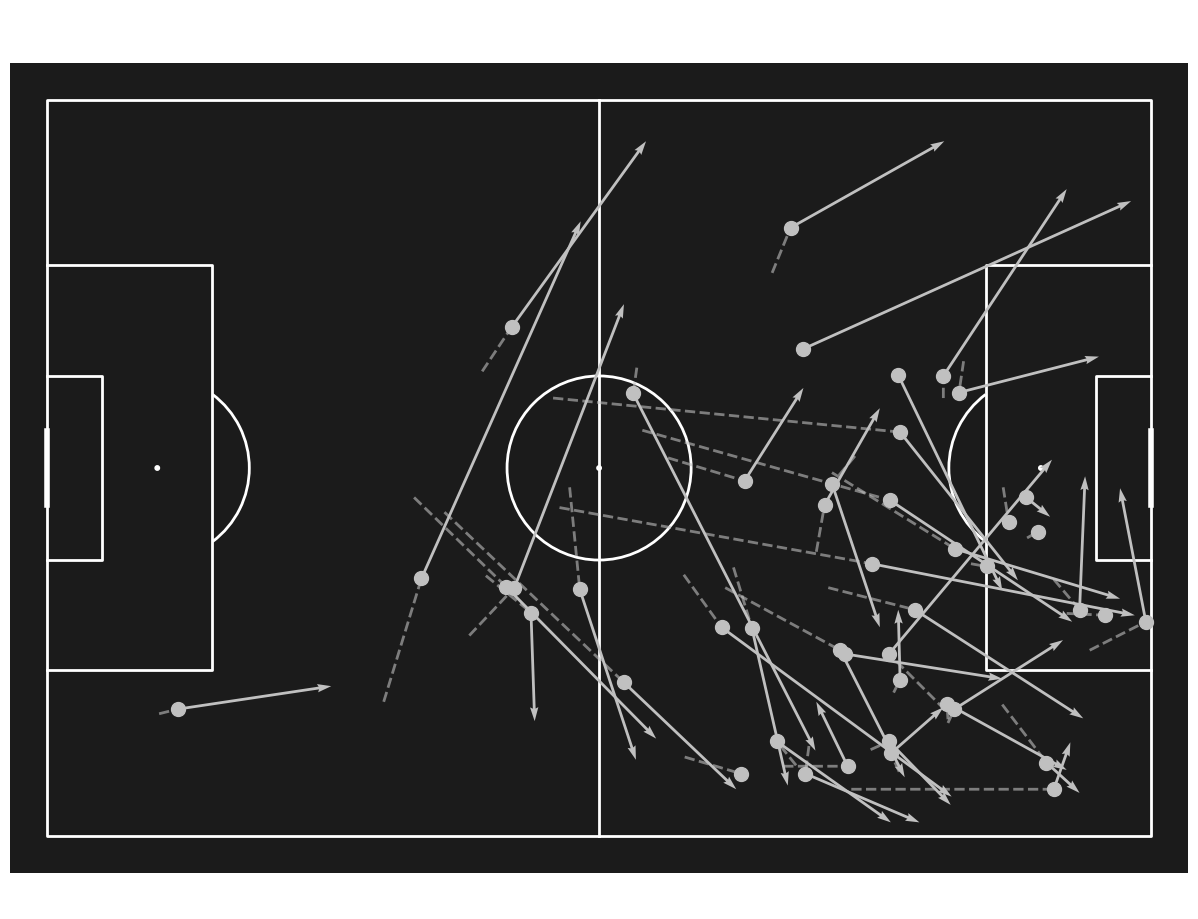

In [126]:
line_width = 2
circle_size = 100
circle_alpha = 1
line_alpha = .6

gray_color = '#c0c0c0'
black_color = '#1B1B1B'  # '#040200', '#1B1B1B'

pitch = Pitch(line_color='white', pitch_color=black_color)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# Plot passes
pitch.scatter(only_pass_start_x, only_pass_start_y, alpha=circle_alpha, s=circle_size, color=grey_color, ax=ax['pitch'], zorder=2)
pitch.arrows(only_pass_start_x, only_pass_start_y,
             only_pass_end_x, only_pass_end_y,
             color=grey_color, linestyle='-', width=line_width,
             ax=ax['pitch'], zorder=1)

# Plot carrys
pitch.scatter(only_carry_end_x, only_carry_end_y, alpha=circle_alpha, s=circle_size, color=grey_color, ax=ax['pitch'], zorder=2)
pitch.lines(only_carry_start_x, only_carry_start_y, 
            only_carry_end_x, only_carry_end_y,
            color=grey_color, linestyles='--', linewidth=line_width, alpha=line_alpha,
            ax=ax['pitch'], zorder=1)

# Plot carrys + passes
pitch.scatter(pass_start_x, pass_start_y, alpha=circle_alpha, s=circle_size, color=grey_color, ax=ax['pitch'], zorder=2)
pitch.arrows(pass_start_x, pass_start_y,
             pass_end_x, pass_end_y,
             color=grey_color, linestyle='-', width=line_width,
             ax=ax['pitch'], zorder=1)
pitch.lines(carry_start_x, carry_start_y, 
            pass_start_x, pass_start_y,
            color=grey_color, linestyles='--', linewidth=line_width, alpha=line_alpha,
            ax=ax['pitch'], zorder=1)

# fig.suptitle(f"{player_name} passes after carrys in match {match_id}", fontsize=30) 
plt.show()

In [ ]:
# passes_and_carrys = pd.concat([wwc2023_events["carrys"], wwc2023_events["passes"]], axis=0).reset_index(drop=True)
# aitana_match = passes_and_carrys[(passes_and_carrys.player == "Aitana Bonmati Conca") & (passes_and_carrys.match_id == match_id)]
# aitana_match.columns

In [ ]:
carry_and_pass_mask = aitana_match['type'].eq('Carry') & aitana_match['type'].shift(-1).eq('Pass')
aitana_match[carry_and_pass_mask]

In [ ]:
aitana_match[aitana_match['index'].isin([3287, 3288])][cols]

In [ ]:
carrys = wwc2023_events["carrys"]
passes = wwc2023_events["passes"]

In [ ]:
aitana_match_carrys_mask = (carrys.player == player_name) & (carrys.match_id == match_id)
aitana_match_carrys = carrys[aitana_match_carrys_mask]

In [ ]:
aitana_match_passes_mask = (passes.player == player_name) & (passes.match_id == match_id)
aitana_match_passes = passes[aitana_match_passes_mask]

In [ ]:
aitana_match_passes.index

In [ ]:
uuid = '5d3b3608-7cf4-4c4b-895a-abf2ccae2aa0'
aitana_match_passes[aitana_match_passes['id'] == uuid]

In [ ]:
cols = ['id', 'location', 'carry_end_location']
aitana_match_carrys[cols]

In [ ]:
aitana_match_carrys[['id', 'related_events', 'related_pass_event']]

In [ ]:
aitana_match['related_events']

In [ ]:
wwc2023_events["carrys"]

In [ ]:
wwc2023_events["passes"]

In [ ]:
wwc2023_events = sb.competition_events(
    country=wwc2023['country_name'].iloc[0],
    division=wwc2023['competition_name'].iloc[0],
    season=wwc2023['season_name'].iloc[0],
    gender=wwc2023['competition_gender'].iloc[0]
)
wwc2023_team_events = wwc2023_events[wwc2023_events['team'] == team_name]
wwc2023_team_events

In [ ]:
wwc2023_team_events.type.unique()

In [ ]:
passes_df = wwc2023_team_events[wwc2023_team_events.type == 'Pass']
passes_df

In [ ]:
passes_df.groupby('match_id').size().reset_index(name='count')

In [ ]:
for column in passes_df.columns:
    print(column)

In [ ]:
cols = ['id', 'player_id', 'location', 'match_id', 'timestamp', 'pass_body_part', 'pass_end_location', 'pass_height', 'pass_outcome', 'pass_shot_assist', 'pass_goal_assist', 'pass_through_ball', 'pass_type', 'under_pressure']
cols

In [ ]:
passes_df[cols].pass_body_part.unique()

In [ ]:
passes_df[cols].pass_outcome.unique()

In [ ]:
passes_df[cols].pass_through_ball.unique()

In [ ]:
passes_df[cols].pass_type.unique()

In [ ]:
passes_df[cols].under_pressure.unique()

In [ ]:
events.info()

In [ ]:
events.type.unique()

In [ ]:
shot_events = events[events['type'] == 'Shot']
shot_events['end_z'].max()

In [ ]:
shot_events['shot_end_location']

In [ ]:
related

In [ ]:
help(parser)

In [ ]:
events_between_carry_and_pass = ['Dribble', 'Pressure']
player_name = "Aitana Bonmati Conca"

line_width = 2
circle_size = 100
circle_alpha = 1
line_alpha = .4

gray_color = '#c0c0c0'
black_color = '#1B1B1B'  # '#040200', '#1B1B1B'


for match_id in team_matches_id:
    match_events = wwc2023_events[wwc2023_events['match_id'] == match_id].sort_values('index')

    # Passes
    pass_not_preceded_by_carry_mask = (
        match_events['type'].eq('Pass') &
        ~(match_events['type'].shift(1).eq('Carry') |
            (match_events['type'].shift(1).isin(events_between_carry_and_pass) &
             match_events['type'].shift(2).eq('Carry')
            )
        )
    )
    
    pass_not_preceded_by_carry_df = match_events[pass_not_preceded_by_carry_mask][cols]
    forward_pass_not_preceded_by_carry_df = pass_not_preceded_by_carry_df[pass_not_preceded_by_carry_df['location'].apply(lambda x: x[0]) < pass_not_preceded_by_carry_df['pass_end_location'].apply(lambda x: x[0])]
    aitana_forward_pass_not_preceded_by_carry_df = forward_pass_not_preceded_by_carry_df[forward_pass_not_preceded_by_carry_df['player'] == player_name]

    only_pass_start_x = [location[0] for location in aitana_forward_pass_not_preceded_by_carry_df['location']]
    only_pass_start_y = [location[1] for location in aitana_forward_pass_not_preceded_by_carry_df['location']]
    only_pass_end_x = [location[0] for location in aitana_forward_pass_not_preceded_by_carry_df['pass_end_location']]
    only_pass_end_y = [location[1] for location in aitana_forward_pass_not_preceded_by_carry_df['pass_end_location']]

    only_pass_colors_and_alphas = aitana_forward_pass_not_preceded_by_carry_df.apply(determine_color_and_alpha, axis=1)
    only_pass_colors, only_pass_alphas = zip(*only_pass_colors_and_alphas)

    
    # Carry + passes
    carry_and_pass_mask = (
        (match_events['type'].eq('Carry') & 
         match_events['type'].shift(-1).eq('Pass') &
         match_events['player'].eq(match_events['player'].shift(-1))
        ) |
        (match_events['type'].eq('Carry') & 
         match_events['type'].shift(-1).isin(events_between_carry_and_pass) & 
         match_events['type'].shift(-2).eq('Pass') & 
         match_events['player'].eq(match_events['player'].shift(-2))
        )
    )
    
    carry_and_pass_df = match_events[carry_and_pass_mask][cols]
    carry_and_pass_df['next_type'] = match_events['type'].shift(-1).where(carry_and_pass_mask)
    
    carry_and_pass_df['pass_location'] = match_events['location'].shift(-1).where(carry_and_pass_mask)
    carry_and_pass_df['pass_location'].mask(carry_and_pass_df['next_type'].isin(events_between_carry_and_pass), match_events['location'].shift(-2).where(carry_and_pass_mask),
                                            inplace=True)
    
    carry_and_pass_df['pass_end_location'] = match_events['pass_end_location'].shift(-1).where(carry_and_pass_mask)
    carry_and_pass_df['pass_end_location'].mask(carry_and_pass_df['next_type'].isin(events_between_carry_and_pass), match_events['pass_end_location'].shift(-2).where(carry_and_pass_mask),
                                            inplace=True)
    carry_and_pass_df['pass_shot_assist'] = match_events['pass_shot_assist'].shift(-1).where(carry_and_pass_mask)
    carry_and_pass_df['pass_shot_assist'].mask(carry_and_pass_df['next_type'].isin(events_between_carry_and_pass), match_events['pass_shot_assist'].shift(-2).where(carry_and_pass_mask),
                                            inplace=True)
    carry_and_pass_df['pass_goal_assist'] = match_events['pass_goal_assist'].shift(-1).where(carry_and_pass_mask)
    carry_and_pass_df['pass_goal_assist'].mask(carry_and_pass_df['next_type'].isin(events_between_carry_and_pass), match_events['pass_goal_assist'].shift(-2).where(carry_and_pass_mask),
                                            inplace=True)
    carry_and_pass_df['pass_through_ball'] = match_events['pass_through_ball'].shift(-1).where(carry_and_pass_mask)
    carry_and_pass_df['pass_through_ball'].mask(carry_and_pass_df['next_type'].isin(events_between_carry_and_pass), match_events['pass_through_ball'].shift(-2).where(carry_and_pass_mask),
                                            inplace=True)
    forward_carry_and_pass_df = carry_and_pass_df[carry_and_pass_df['location'].apply(lambda x: x[0]) < carry_and_pass_df['pass_end_location'].apply(lambda x: x[0])]
    aitana_forward_carry_and_pass_df = forward_carry_and_pass_df[forward_carry_and_pass_df['player'] == player_name]

    carry_start_x = [location[0] for location in aitana_forward_carry_and_pass_df['location']]
    carry_start_y = [location[1] for location in aitana_forward_carry_and_pass_df['location']]
    pass_start_x = [location[0] for location in aitana_forward_carry_and_pass_df['pass_location']]
    pass_start_y = [location[1] for location in aitana_forward_carry_and_pass_df['pass_location']]
    pass_end_x = [location[0] for location in aitana_forward_carry_and_pass_df['pass_end_location']]
    pass_end_y = [location[1] for location in aitana_forward_carry_and_pass_df['pass_end_location']]

    carry_and_pass_colors_and_alphas = aitana_forward_carry_and_pass_df.apply(determine_color_and_alpha, axis=1)
    carry_and_pass_colors, carry_and_pass_alphas = zip(*carry_and_pass_colors_and_alphas)


    # Carrys
    carry_mask = match_events['type'].eq('Carry')

    carry_not_followed_by_pass_mask = carry_mask & ~carry_and_pass_mask
    
    carry_not_followed_by_pass_df = match_events[carry_not_followed_by_pass_mask][cols]
    forward_carry_not_followed_by_pass_df = carry_not_followed_by_pass_df[carry_not_followed_by_pass_df['location'].apply(lambda x: x[0]) < carry_not_followed_by_pass_df['carry_end_location'].apply(lambda x: x[0])]
    aitana_forward_carry_not_followed_by_pass_df = forward_carry_not_followed_by_pass_df[forward_carry_not_followed_by_pass_df['player'] == player_name]

    only_carry_start_x = [location[0] for location in aitana_forward_carry_not_followed_by_pass_df['location']]
    only_carry_start_y = [location[1] for location in aitana_forward_carry_not_followed_by_pass_df['location']]
    only_carry_end_x = [location[0] for location in aitana_forward_carry_not_followed_by_pass_df['carry_end_location']]
    only_carry_end_y = [location[1] for location in aitana_forward_carry_not_followed_by_pass_df['carry_end_location']]

    only_carry_colors_and_alphas = aitana_forward_carry_not_followed_by_pass_df.apply(determine_color_and_alpha, axis=1)
    only_carry_colors, only_carry_alphas = zip(*only_carry_colors_and_alphas)



    # Plot   
    pitch = Pitch(line_color='white', pitch_color=black_color)
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                         endnote_height=0.04, title_space=0, endnote_space=0)
    
    # Plot passes
    pitch.scatter(only_pass_start_x, only_pass_start_y, alpha=only_pass_alphas, s=circle_size, color=only_pass_colors, ax=ax['pitch'], zorder=2)
    pitch.arrows(only_pass_start_x, only_pass_start_y,
                 only_pass_end_x, only_pass_end_y,
                 color=only_pass_colors, linestyle='-', width=line_width, alpha=only_pass_alphas,
                 ax=ax['pitch'], zorder=1)
    
    # Plot carrys
    pitch.scatter(only_carry_end_x, only_carry_end_y, alpha=only_carry_alphas, s=circle_size, color=only_carry_colors, ax=ax['pitch'], zorder=2)
    pitch.lines(only_carry_start_x, only_carry_start_y, 
                only_carry_end_x, only_carry_end_y,
                color=only_carry_colors, linestyles='--', linewidth=line_width, alpha=only_carry_alphas,
                ax=ax['pitch'], zorder=1)
    
    # Plot carrys + passes
    pitch.scatter(pass_start_x, pass_start_y, alpha=carry_and_pass_alphas, s=circle_size, color=carry_and_pass_colors, ax=ax['pitch'], zorder=2)
    pitch.arrows(pass_start_x, pass_start_y,
                 pass_end_x, pass_end_y,
                 color=carry_and_pass_colors, linestyle='-', width=line_width, alpha=carry_and_pass_alphas,
                 ax=ax['pitch'], zorder=1)
    pitch.lines(carry_start_x, carry_start_y, 
                pass_start_x, pass_start_y,
                color=carry_and_pass_colors, linestyles='--', linewidth=line_width, alpha=carry_and_pass_alphas,
                ax=ax['pitch'], zorder=1)
    
    fig.suptitle(f"{player_name} in match {match_id}", fontsize=30)
    plt.savefig(f"img/{match_id}.png")
    plt.show()